In [1]:
from ContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
from utils import *
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
trainpath = '../datasets/PlantPseAAC/PlantPseAAC978_train_MVMD.mat'
testpath = '../datasets/PlantPseAAC/PlantPseAAC978_test_MVMD.mat'

train_ = loadmat(trainpath)
train_data, train_labels = train_['transformed_train_data'], np.array(train_['labels'])

test_ = loadmat(testpath)
test_data, test_labels = test_['transformed_test_data'], np.array(test_['labels'])

a = train_data.max(axis=0)
b = train_data.min(axis=0)

train_spikes = encoding(train_data, device, a, b)
test_spikes = encoding(test_data, device, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 390/390 [00:00<00:00, 7793.02it/s]

Train data shape:  (588, 1, 300)
Train labels shape:  (588, 12)
Test data shape:  (390, 1, 300)
Test labels shape:  (390, 12)


In [3]:
# samples = [196, 196, 196]
# labels = [4, 4, 4]
# seeds = return_seed(samples, labels, train_labels)
# seeds

## CIFDM Training and Evaluation Mode

Training and Evaluating on task 1
Train data shape is  (196, 1, 300)
Train Labels shape is  (196, 4)
Classes trained are: 0 to 4


  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 18
Class 1, class 1 neurons = 4, class 0 neurons = 3
Class 2, class 1 neurons = 3, class 0 neurons = 4
Class 3, class 1 neurons = 1, class 0 neurons = 6


100%|██████████| 2500/2500 [50:50<00:00,  1.22s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 4) (390, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.204487 |
| zero_one_loss       | 0.615385 |
| one_error           | 0        |
| micro av. jaccard   | 0.245863 |
| macro av. jaccard   | 0.150327 |
| micro av. precision | 0.337662 |
| macro av. precision | 0.183142 |
| micro av. recall    | 0.474886 |
| macro av. recall    | 0.357356 |
| micro av. f1        | 0.394687 |
| macro av. f1        | 0.24135  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 4) (390, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.204487 |
| zero_one_loss       | 0.615385 |
| one_error           | 0        |
| micro av. jaccard   | 0.245863 |
| macro av. jaccard   | 0.150327 |
| micro av. precision | 0.337662 |
| macro av. precision | 0.183142 |
| mi

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 3, class 0 neurons = 20
Class 1, class 1 neurons = 5, class 0 neurons = 6
Class 2, class 1 neurons = 6, class 0 neurons = 5
Class 3, class 1 neurons = 1, class 0 neurons = 16
Class 4, class 1 neurons = 1, class 0 neurons = 2
Class 5, class 1 neurons = 1, class 0 neurons = 2
Class 6, class 1 neurons = 1, class 0 neurons = 2
Class 7, class 1 neurons = 4, class 0 neurons = 2


100%|██████████| 2500/2500 [1:35:43<00:00,  2.30s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 4) (390, 4)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0955128 |
| zero_one_loss       | 0.338462  |
| one_error           | 0         |
| micro av. jaccard   | 0.0387097 |
| macro av. jaccard   | 0.0522123 |
| micro av. precision | 0.084507  |
| macro av. precision | 0.0825611 |
| micro av. recall    | 0.0666667 |
| macro av. recall    | 0.145833  |
| micro av. f1        | 0.0745342 |
| macro av. f1        | 0.0972222 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 8) (390, 8)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.15      |
| zero_one_loss       | 0.725641  |
| one_error           | 0         |
| micro av. jaccard   | 0.186087  |
| macro av. jaccard   | 0.0973248 |
| micro av. precision | 0.286863  |
| macro av. precis

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 22
Class 1, class 1 neurons = 7, class 0 neurons = 11
Class 2, class 1 neurons = 10, class 0 neurons = 6
Class 3, class 1 neurons = 1, class 0 neurons = 20
Class 4, class 1 neurons = 3, class 0 neurons = 6
Class 5, class 1 neurons = 2, class 0 neurons = 6
Class 6, class 1 neurons = 2, class 0 neurons = 6
Class 7, class 1 neurons = 6, class 0 neurons = 5
Class 8, class 1 neurons = 1, class 0 neurons = 5
Class 9, class 1 neurons = 1, class 0 neurons = 4
Class 10, class 1 neurons = 1, class 0 neurons = 4
Class 11, class 1 neurons = 2, class 0 neurons = 4


100%|██████████| 2500/2500 [2:51:57<00:00,  4.13s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 4) (390, 4)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.123718  |
| zero_one_loss       | 0.453846  |
| one_error           | 0         |
| micro av. jaccard   | 0.0809524 |
| macro av. jaccard   | 0.0874594 |
| micro av. precision | 0.137097  |
| macro av. precision | 0.104391  |
| micro av. recall    | 0.165049  |
| macro av. recall    | 0.296875  |
| micro av. f1        | 0.14978   |
| macro av. f1        | 0.153947  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 12) (390, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.13953   |
| zero_one_loss       | 0.864103  |
| one_error           | 0         |
| micro av. jaccard   | 0.157419  |
| macro av. jaccard   | 0.0906543 |
| micro av. precision | 0.251546  |
| macro av. prec

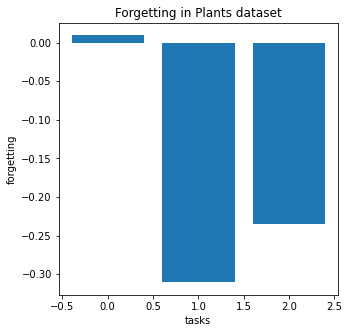

In [4]:
hparams_dict = {
    'inputs': 300,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.40,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-3,
    'sim_time': 600,
    'n_epochs': 2500,
    'print_every': 500,
    'name': 'Plants',
    'tasks': {'samples': [196, 196, 196], 'labels': [4, 4, 4]},
    'seed': 2,
    'ckpt_dir': './checkpoints/plants',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (196, 1, 300)
Train Labels shape is  (196, 4)
Classes trained are: 0 to 4


  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 3
Class 1, class 1 neurons = 1, class 0 neurons = 18
Class 2, class 1 neurons = 1, class 0 neurons = 6
Class 3, class 1 neurons = 1, class 0 neurons = 7


100%|██████████| 2500/2500 [54:39<00:00,  1.31s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 4) (390, 4)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0615385 |
| zero_one_loss       | 0.228205  |
| one_error           | 0         |
| micro av. jaccard   | 0.111111  |
| macro av. jaccard   | 0.0658602 |
| micro av. precision | 0.190476  |
| macro av. precision | 0.088969  |
| micro av. recall    | 0.210526  |
| macro av. recall    | 0.164773  |
| micro av. f1        | 0.2       |
| macro av. f1        | 0.115546  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 4) (390, 4)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0615385 |
| zero_one_loss       | 0.228205  |
| one_error           | 0         |
| micro av. jaccard   | 0.111111  |
| macro av. jaccard   | 0.0658602 |
| micro av. precision | 0.190476  |
| macro av. precis

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 6
Class 1, class 1 neurons = 3, class 0 neurons = 20
Class 2, class 1 neurons = 1, class 0 neurons = 13
Class 3, class 1 neurons = 1, class 0 neurons = 17
Class 4, class 1 neurons = 2, class 0 neurons = 3
Class 5, class 1 neurons = 1, class 0 neurons = 2
Class 6, class 1 neurons = 1, class 0 neurons = 2
Class 7, class 1 neurons = 4, class 0 neurons = 2


100%|██████████| 2500/2500 [1:49:21<00:00,  2.62s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 4) (390, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.239103 |
| zero_one_loss       | 0.712821 |
| one_error           | 0        |
| micro av. jaccard   | 0.142529 |
| macro av. jaccard   | 0.100773 |
| micro av. precision | 0.253061 |
| macro av. precision | 0.219464 |
| micro av. recall    | 0.246032 |
| macro av. recall    | 0.244002 |
| micro av. f1        | 0.249497 |
| macro av. f1        | 0.174811 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 8) (390, 8)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.14391   |
| zero_one_loss       | 0.784615  |
| one_error           | 0         |
| micro av. jaccard   | 0.136538  |
| macro av. jaccard   | 0.0837199 |
| micro av. precision | 0.251773  |
| macro av. precision | 0.16714

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 7, class 0 neurons = 11
Class 1, class 1 neurons = 5, class 0 neurons = 22
Class 2, class 1 neurons = 1, class 0 neurons = 16
Class 3, class 1 neurons = 1, class 0 neurons = 20
Class 4, class 1 neurons = 6, class 0 neurons = 4
Class 5, class 1 neurons = 2, class 0 neurons = 6
Class 6, class 1 neurons = 2, class 0 neurons = 3
Class 7, class 1 neurons = 6, class 0 neurons = 5
Class 8, class 1 neurons = 1, class 0 neurons = 4
Class 9, class 1 neurons = 1, class 0 neurons = 5
Class 10, class 1 neurons = 2, class 0 neurons = 4
Class 11, class 1 neurons = 1, class 0 neurons = 4


100%|██████████| 2500/2500 [2:51:50<00:00,  4.12s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 4) (390, 4)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.126282  |
| zero_one_loss       | 0.466667  |
| one_error           | 0         |
| micro av. jaccard   | 0.087963  |
| macro av. jaccard   | 0.0917708 |
| micro av. precision | 0.143939  |
| macro av. precision | 0.108329  |
| micro av. recall    | 0.184466  |
| macro av. recall    | 0.321875  |
| micro av. f1        | 0.161702  |
| macro av. f1        | 0.161811  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 12) (390, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.132051  |
| zero_one_loss       | 0.907692  |
| one_error           | 0         |
| micro av. jaccard   | 0.11588   |
| macro av. jaccard   | 0.0866339 |
| micro av. precision | 0.220109  |
| macro av. prec

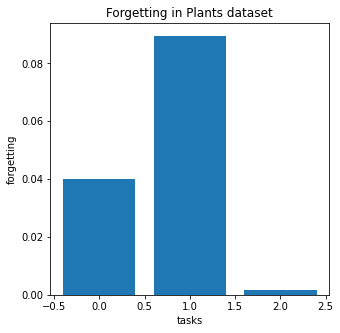

In [5]:
hparams_dict = {
    'inputs': 300,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.40,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-3,
    'sim_time': 600,
    'n_epochs': 2500,
    'print_every': 500,
    'name': 'Plants',
    'tasks': {'samples': [196, 196, 196], 'labels': [4, 4, 4]},
    'seed': 244,
    'ckpt_dir': './checkpoints/plants',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (196, 1, 300)
Train Labels shape is  (196, 4)
Classes trained are: 0 to 4


  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 6
Class 1, class 1 neurons = 1, class 0 neurons = 10
Class 2, class 1 neurons = 1, class 0 neurons = 18
Class 3, class 1 neurons = 4, class 0 neurons = 3


100%|██████████| 2500/2500 [57:06<00:00,  1.37s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 4) (390, 4)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0666667 |
| zero_one_loss       | 0.248718  |
| one_error           | 0         |
| micro av. jaccard   | 0.103448  |
| macro av. jaccard   | 0.0659091 |
| micro av. precision | 0.190476  |
| macro av. precision | 0.0892857 |
| micro av. recall    | 0.184615  |
| macro av. recall    | 0.164773  |
| micro av. f1        | 0.1875    |
| macro av. f1        | 0.115767  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 4) (390, 4)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0666667 |
| zero_one_loss       | 0.248718  |
| one_error           | 0         |
| micro av. jaccard   | 0.103448  |
| macro av. jaccard   | 0.0659091 |
| micro av. precision | 0.190476  |
| macro av. precis

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 13
Class 1, class 1 neurons = 1, class 0 neurons = 15
Class 2, class 1 neurons = 3, class 0 neurons = 20
Class 3, class 1 neurons = 5, class 0 neurons = 6
Class 4, class 1 neurons = 1, class 0 neurons = 2
Class 5, class 1 neurons = 1, class 0 neurons = 2
Class 6, class 1 neurons = 1, class 0 neurons = 2
Class 7, class 1 neurons = 2, class 0 neurons = 3


100%|██████████| 2500/2500 [1:45:21<00:00,  2.53s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 4) (390, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.240385 |
| zero_one_loss       | 0.712821 |
| one_error           | 0        |
| micro av. jaccard   | 0.151584 |
| macro av. jaccard   | 0.105739 |
| micro av. precision | 0.218954 |
| macro av. precision | 0.238303 |
| micro av. recall    | 0.330049 |
| macro av. recall    | 0.322378 |
| micro av. f1        | 0.263261 |
| macro av. f1        | 0.185619 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 8) (390, 8)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.148077  |
| zero_one_loss       | 0.784615  |
| one_error           | 0         |
| micro av. jaccard   | 0.141264  |
| macro av. jaccard   | 0.0848139 |
| micro av. precision | 0.219653  |
| macro av. precision | 0.17331

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 16
Class 1, class 1 neurons = 1, class 0 neurons = 16
Class 2, class 1 neurons = 5, class 0 neurons = 25
Class 3, class 1 neurons = 7, class 0 neurons = 11
Class 4, class 1 neurons = 2, class 0 neurons = 6
Class 5, class 1 neurons = 2, class 0 neurons = 6
Class 6, class 1 neurons = 2, class 0 neurons = 6
Class 7, class 1 neurons = 6, class 0 neurons = 4
Class 8, class 1 neurons = 4, class 0 neurons = 1
Class 9, class 1 neurons = 2, class 0 neurons = 4
Class 10, class 1 neurons = 1, class 0 neurons = 5
Class 11, class 1 neurons = 1, class 0 neurons = 4


100%|██████████| 2500/2500 [2:51:49<00:00,  4.12s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 4) (390, 4)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.186538  |
| zero_one_loss       | 0.594872  |
| one_error           | 0         |
| micro av. jaccard   | 0.104615  |
| macro av. jaccard   | 0.0835009 |
| micro av. precision | 0.15814   |
| macro av. precision | 0.102624  |
| micro av. recall    | 0.236111  |
| macro av. recall    | 0.278399  |
| micro av. f1        | 0.189415  |
| macro av. f1        | 0.149381  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(390, 12) (390, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.161966  |
| zero_one_loss       | 0.910256  |
| one_error           | 0         |
| micro av. jaccard   | 0.13173   |
| macro av. jaccard   | 0.0786626 |
| micro av. precision | 0.199653  |
| macro av. prec

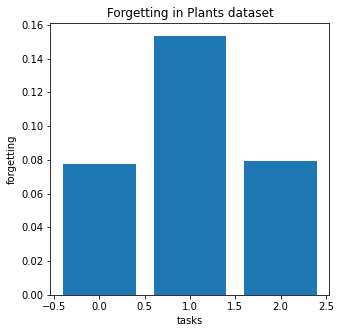

In [6]:
hparams_dict = {
    'inputs': 300,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.40,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-3,
    'sim_time': 600,
    'n_epochs': 2500,
    'print_every': 500,
    'name': 'Plants',
    'tasks': {'samples': [196, 196, 196], 'labels': [4, 4, 4]},
    'seed': 833,
    'ckpt_dir': './checkpoints/plants',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)